# Data Check: Metropolitan areas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [8]:
pkls_path = pkls = r'D:\Tesis\ResEleCon-MX\pickles'
concentrador = pd.read_pickle(pkls_path + '\concentrador_2018.pkl')

In [9]:
concentrador['gasto_tri_total_gas'] = concentrador[['gasto_tri_gas','gasto_tri_lpg']].sum(axis=1, min_count=1)
concentrador['gasto_tri_total_gasolina'] = concentrador[['gasto_tri_Magna','gasto_tri_Premium']].sum(axis=1, min_count=1)

## Check for true nulls

In [5]:
concentrador.loc[(~concentrador['combustible'].isin([3,4])) & (concentrador['calent_gas']==2) & (concentrador['tanque_gas']==2) 
                 & (concentrador['gasto_tri_total_gas'].isnull()), 'gasto_tri_total_gas'] = 0

concentrador.loc[(concentrador['vehiculos']==0) & (concentrador['gasto_tri_total_gasolina'].isnull()),
                 'gasto_tri_total_gasolina'] = 0

In [17]:
concentrador.to_pickle(pkls_path + '\concentrador_gasfix_2018.pkl')

In [7]:
concentrador.describe()

,folioviv,foliohog,CVE_MUN,estado,publico,CVE_ZM,CVE_ENT,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,ocupados,ing_cor,gasto_mon,energia,vehiculos,tipo_viv,antiguedad,num_cuarto,disp_elect,focos_inca,focos_ahor,combustible,tenencia,calent_sol,calent_gas,tanque_gas,aire_acond,calefacc,gasto_tri_ele,gasto_tri_gas,gasto_tri_lpg,gasto_tri_oil,gasto_tri_diesel,gasto_tri_coal,gasto_tri_wood,gasto_tri_heat,gasto_tri_Magna,gasto_tri_Premium,gasto_tri_Die-Gas,gasto_tri_total_gas,gasto_tri_total_gasolina
count,3.110000e+04,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,3.110000e+04,3.110000e+04,31100.000000,31100.000000,31070.000000,25076.00000,31100.000000,31100.000000,31043.000000,31043.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,31100.000000,28303.000000,3686.000000,16574.000000,18.000000,10.000000,864.000000,449.000000,129.000000,13909.000000,1393.000000,69.000000,21170.000000,29174.000000
mean,1.532120e+09,1.019035,15314.775659,15.283859,1693.304214,14.836921,15.283859,1.345145,2.591961,238.862733,4082.892958,644.437395,2.154630,1.309936,49.518585,6.386399,3.507621,1.698810,1.808810,2.838907,0.668714,1.680096,5.724480e+04,3.585690e+04,1571.029562,0.756109,1.142356,23.30910,3.976270,1.019100,1.279161,6.452985,3.119357,3.073441,1.936849,1.497878,1.870579,1.749839,1.955177,835.292990,929.439699,1249.081883,676.347222,1254.372000,249.118333,550.656704,1101.731473,5098.900246,6501.117753,3133.138841,1139.735374,2741.367675
std,9.164128e+08,0.162651,9177.380002,9.167614,2448.514643,9.203392,9.167614,0.675375,0.751045,154.753525,2386.560107,624.722751,0.647871,0.462474,15.517420,2.529301,1.769338,1.132721,1.169942,1.370390,0.948525,1.058990,6.630378e+04,3.428771e+04,1532.746407,0.921552,0.533091,15.31079,1.555582,0.250062,2.594685,5.662763,0.573231,1.230609,0.243238,0.500004,0.335671,0.433112,0.206919,1152.479338,728.367251,834.671480,873.242448,1821.187653,337.073538,882.672515,703.764174,4294.313899,5404.315484,3218.587592,852.759146,4193.036139
min,1.000136e+08,1.000000,1001.000000,1.000000,0.000000,1.010000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,1.000000,1.000000,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.500000,25.000000,104.510000,39.000000,52.250000,0.000000,29.030000,42.000000,58.060000,174.190000,60.960000,0.000000,0.000000
25%,8.016208e+08,1.000000,8019.000000,8.000000,0.000000,7.020000,8.000000,1.000000,2.000000,116.000000,2131.000000,259.000000,2.000000,1.000000,38.000000,4.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.722017e+04,1.753493e+04,580.640000,0.000000,1.000000,12.00000,3.000000,1.000000,0.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,300.000000,540.000000,600.000000,106.207500,58.785000,87.090000,150.000000,580.640000,2322.580000,2903.220000,870.960000,580.640000,0.000000
50%,1.507773e+09,1.000000,15033.000000,15.000000,822.830000,14.010000,15.000000,1.000000,2.000000,229.000000,4058.000000,422.000000,2.000000,1.000000,48.000000,6.000000,3.000000,2.000000,2.000000,3.000000,0.000000,2.000000,4.278390e+04,2.751594e+04,1290.000000,1.000000,1.000000,20.00000,4.000000,1.000000,0.000000,6.000000,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,478.500000,787.500000,1152.580000,300.000000,278.705000,145.160000,300.000000,900.000000,4200.000000,5225.800000,1741.930000,1050.000000,696.770000
75%,2.301926e+09,1.000000,23005.000000,23.000000,2519.950000,23.010000,23.000000,1.000000,3.000000,365.000000,6085.250000,773.000000

## Create DataFrame

In [11]:
dataRoot = r'D:\Tesis\Datos' #path of data folder
ZM_2015 = pd.read_csv(dataRoot + "\Zonas metropolitanas\ZM_2015.csv", encoding='latin-1', usecols=list(range(6)))
metropolis_list = ZM_2015.set_index('CVE_ZM')['NOM_ZM'].to_dict()

In [12]:
percent_completeness = pd.DataFrame()
col_names = list(concentrador)
subset = col_names[col_names.index('folioviv'):col_names.index('factor')]+['publico']+col_names[col_names.index('disp_elect'):]

for key, name in metropolis_list.items():
    # Columns for completeness check
    con_df = concentrador.loc[concentrador['CVE_ZM']==key, subset]
    percent_completeness[name] = (con_df.notnull().sum() * 100 / len(con_df))

In [13]:
def Service_Availability(keyDict, infra, legend):
    df_list = []
    for key, name in metropolis_list.items():
        s = pd.DataFrame()
        con_df = concentrador.loc[concentrador['CVE_ZM']==key]
        s[name] = (con_df[infra].value_counts(normalize=True, dropna=False) * 100)
        df_list.append(s)
    s = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), df_list)
    s['Type'] = s.index.to_series().map(keyDict)
    cols = list(s.columns); cols = [cols[-1]] + cols[:-1]; s = s[cols]
    return s.T, legend


In [14]:
frames_list = []

keyDict = {1:'public', 2:'priv plant', 3:'solar', 4:'other', 5:'no elec'}
frames_list.append(Service_Availability(keyDict, 'disp_elect', "Electricity source"))

keyDict = {1:'wood', 2:'coal', 3:'gas tank', 4:'gas pipe', 5:'elec', 6:'other'}
frames_list.append(Service_Availability(keyDict, 'combustible', "Energy source for cooking"))

keyDict = {1:'yes', 2:'no'}
frames_list.append(Service_Availability(keyDict, 'calent_sol', "Solar heater"))

frames_list.append(Service_Availability(keyDict, 'calent_gas', "Gas heater"))
frames_list.append(Service_Availability(keyDict, 'tanque_gas', "Gas tank"))
frames_list.append(Service_Availability(keyDict, 'aire_acond', "Air conditioned"))
frames_list.append(Service_Availability(keyDict, 'calefacc', "Heating"))

keyDict = {1:'rented', 2:'lend', 3:'own and paying', 4:'own', 5:'litigated', 6:'other'}
frames_list.append(Service_Availability(keyDict, 'tenencia', "Household ownership"))

In [15]:
with pd.ExcelWriter('csv_files/data_check_2018_nanAsZero.xlsx') as writer:
    percent_completeness.T.to_excel(writer, sheet_name='Data available')
    for df, legend in frames_list:
        df.to_excel(writer, sheet_name=legend)

# National Check

In [ ]:
percent_completeness = pd.DataFrame()
col_names = list(concentrador)
subset = col_names[col_names.index('folioviv'):col_names.index('factor')]+['publico']+col_names[col_names.index('disp_elect'):]

# Columns for completeness check
con_df = concentrador[subset]
percent_completeness = (con_df.notnull().sum() * 100 / len(con_df))

In [ ]:
def SA_National(keyDict, infra, legend):
    s = (concentrador[infra].value_counts(normalize=True, dropna=False) * 100).to_frame()
    s['Type'] = s.index.map(keyDict)
    return s, legend

In [ ]:
frames_list = []

keyDict = {1:'public', 2:'priv plant', 3:'solar', 4:'other', 5:'no elec'}
frames_list.append(SA_National(keyDict, 'disp_elect', "Electricity source"))

keyDict = {1:'wood', 2:'coal', 3:'gas tank', 4:'gas pipe', 5:'elec', 6:'other'}
frames_list.append(SA_National(keyDict, 'combustible', "Energy source for cooking"))

keyDict = {1:'yes', 2:'no'}
frames_list.append(SA_National(keyDict, 'calent_sol', "Solar heater"))

frames_list.append(SA_National(keyDict, 'calent_gas', "Gas heater"))
frames_list.append(SA_National(keyDict, 'tanque_gas', "Gas tank"))
frames_list.append(SA_National(keyDict, 'aire_acond', "Air conditioned"))
frames_list.append(SA_National(keyDict, 'calefacc', "Heating"))

keyDict = {1:'rented', 2:'lend', 3:'own and paying', 4:'own', 5:'litigated', 6:'other'}
frames_list.append(SA_National(keyDict, 'tenencia', "Household ownership"))

In [ ]:
with pd.ExcelWriter('csv_files/data_check_2016_nanAsZero_national.xlsx') as writer:
    percent_completeness.to_excel(writer, sheet_name='Data available')
    for df, legend in frames_list:
        df.to_excel(writer, sheet_name=legend)

# Data description

In [21]:
no_GasData = concentrador.loc[((concentrador['combustible'].isin([3,4])) | (concentrador['calent_gas']==1) | (concentrador['tanque_gas']==1)) 
                 & (concentrador['gasto_tri_total_gas'].isnull())].copy()

GasData = concentrador.loc[~(((concentrador['combustible'].isin([3,4])) | (concentrador['calent_gas']==1) | (concentrador['tanque_gas']==1)) 
                 & (concentrador['gasto_tri_total_gas'].isnull()))].copy()

In [22]:
variables = ['tam_loc','est_socio','disp_elect','tenencia','calent_sol','calent_gas','tanque_gas','aire_acond',
             'calefacc','publico','focos_inca','focos_ahor','combustible','gasto_tri_ele','gasto_tri_total_gasolina']
var_cont = ['publico','focos_inca','focos_ahor','combustible','gasto_tri_ele','gasto_tri_total_gasolina']

## Medidas de tendencia central

### Gas $

In [7]:
GasData[var_cont].describe()

,publico,focos_inca,focos_ahor,combustible,gasto_tri_ele,gasto_tri_total_gasolina
count,21170.000000,21122.000000,21122.000000,21170.000000,19444.000000,10477.000000
mean,1777.612886,1.336284,6.361424,3.149173,858.066238,5410.307647
std,2541.257977,2.614694,5.646973,0.651126,1210.324587,4583.164457
min,0.000000,0.000000,0.000000,1.000000,12.500000,58.060000
25%,0.000000,0.000000,3.000000,3.000000,300.000000,2322.580000
50%,899.970000,0.000000,6.000000,3.000000,502.500000,4354.830000
75%,2622.800000,2.000000,8.000000,3.000000,900.000000,6967.740000
max,53897.060000,80.000000,99.000000,6.000000,30750.000000,62129.030000


### No gas $

In [8]:
no_GasData[var_cont].describe()

,publico,focos_inca,focos_ahor,combustible,gasto_tri_ele,gasto_tri_total_gasolina
count,9930.000000,9921.000000,9921.000000,9930.000000,8859.000000,4612.000000
mean,1513.564580,1.157545,6.647919,3.055791,785.309578,5050.491615
std,2227.492763,2.547428,5.691614,0.345480,1012.284715,4363.208649
min,0.000000,0.000000,0.000000,1.000000,12.500000,145.160000
25%,0.000000,0.000000,3.000000,3.000000,285.000000,2322.580000
50%,642.850000,0.000000,6.000000,3.000000,450.000000,3982.255000
75%,2262.820000,2.000000,8.000000,3.000000,900.000000,6000.000000
max,27642.830000,98.000000,89.000000,6.000000,18000.000000,84774.190000


## Histogramas

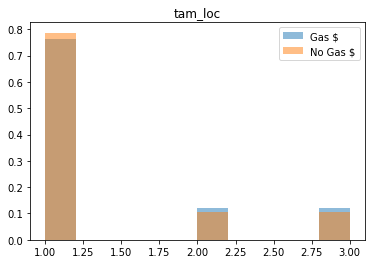

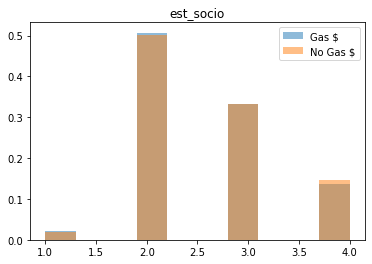

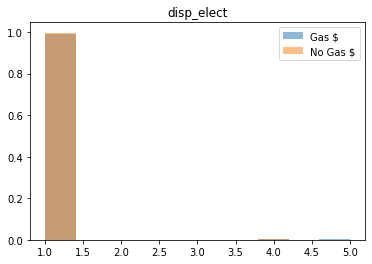

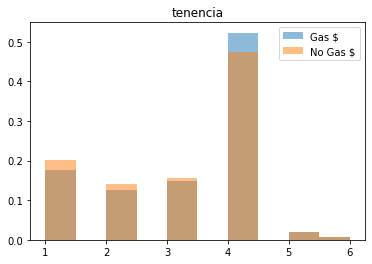

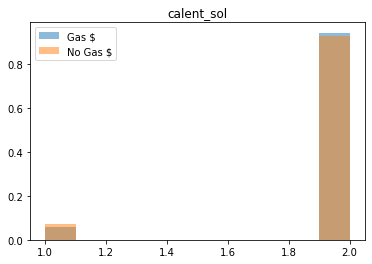

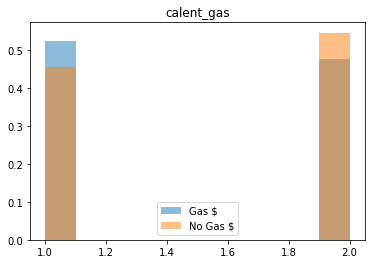

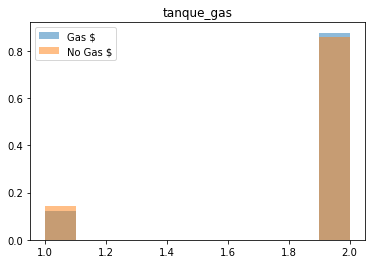

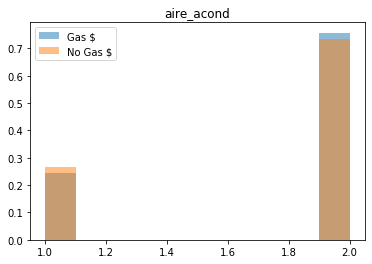

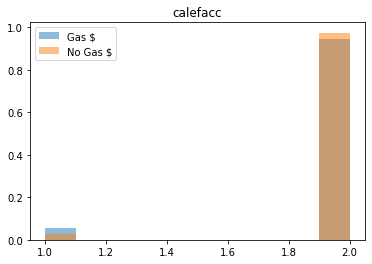

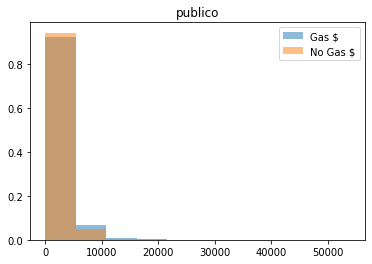

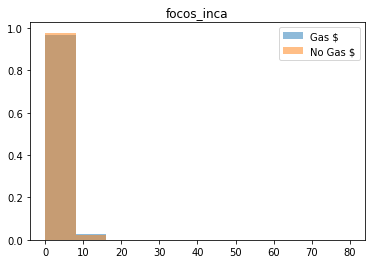

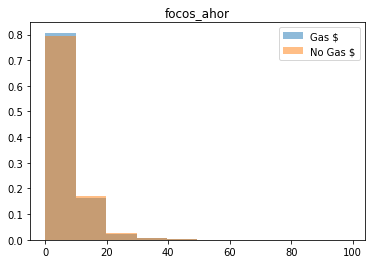

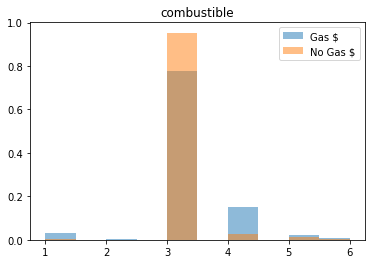

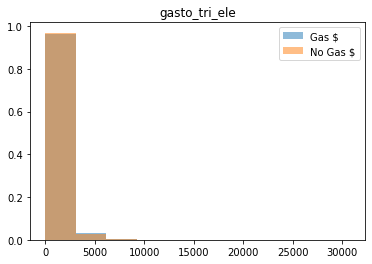

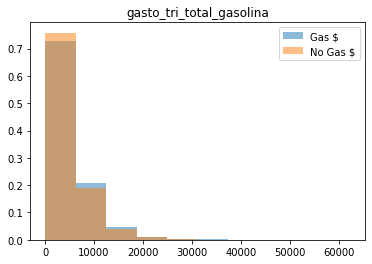

In [64]:
for i, col in enumerate(no_GasData[variables].columns):
    plt.figure(i)
    
    arr, xbins, _ = plt.hist(GasData[col].dropna(),
        weights = np.ones_like(GasData[col].dropna())/len(GasData[col].dropna()),
        alpha=0.5, label='Gas $')
    #for i in range(len(arr)):
    #    plt.text(xbins[i],arr[i],str(arr[0]))
    
    plt.hist(no_GasData[col].dropna(),
        weights = np.ones_like(no_GasData[col].dropna())/len(no_GasData[col].dropna()),
        bins=xbins, alpha=0.5, label='No Gas $')
    plt.title(col)
    plt.legend()